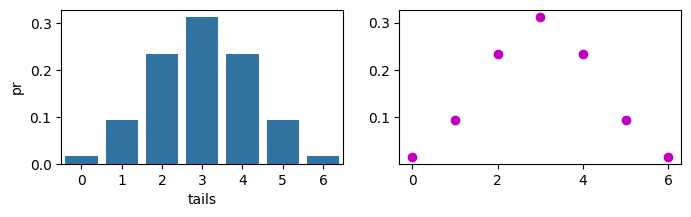

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

# Map binary digit to coin face
coin = lambda a: 'H' if a == '0' else 'T'

# Dictionary to count occurrences of tail counts
counts = defaultdict(int)

# Function to count number of tails in a sequence
tail = lambda xs: sum(1 for n in xs if n == 'T')

# Generate all possible outcomes for 6 coin flips
coins = []
for x in range(64):
    coins.append(''.join(coin(b) for b in bin(x)[2:].zfill(6)))

# Count frequency of each tail count
for c in coins:
    counts[tail(c)] += 1

# Create DataFrame of results
df = pd.DataFrame(columns=['tails', 'count'])
for i, (k, v) in enumerate(sorted(counts.items())):
    df.loc[i] = [k, v]

# Compute probability for each number of tails
df['pr'] = df['count'] / 64

# Scatter plot of tail counts vs probabilities
fig, ax = plt.subplots(1, 2, figsize=(8, 2))
sns.barplot(x=df['tails'], y=df['pr'], ax=ax[0])
ax[1].scatter(df['tails'], df['pr'], color='m')
fig.savefig('img/six_coin_flips')
plt.show()